In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("default")


In [2]:
df = pd.read_csv("../data/raw/neo.csv")
df.head()


,Object,Close-Approach (CA) Date,CA DistanceNominal (au),CA DistanceMinimum (au),V relative(km/s),V infinity(km/s),H(mag),Diameter,Rarity
0,(2025 WT3),2025-Dec-22 01:25 ± < 00:01,0.04088,0.04086,4.52,4.51,25.7,19 m - 43 m,0
1,(2025 XT7),2025-Dec-22 10:45 ± < 00:01,0.02636,0.02611,7.58,7.57,27.1,10 m - 23 m,0
2,(2025 YH3),2025-Dec-22 12:44 ± < 00:01,0.00305,0.00305,10.11,10.02,27.7,7.6 m - 17 m,0
3,(2025 YU),2025-Dec-22 15:40 ± < 00:01,0.03861,0.03842,8.80,8.79,25.8,18 m - 41 m,0
4,(2025 YC3),2025-Dec-22 16:14 ± < 00:01,0.02475,0.02448,12.28,12.27,23.1,63 m - 140 m,1


In [3]:
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Object                    41 non-null     object 
 1   Close-Approach (CA) Date  41 non-null     object 
 2   CA DistanceNominal (au)   41 non-null     float64
 3   CA DistanceMinimum (au)   41 non-null     float64
 4   V relative(km/s)          41 non-null     float64
 5   V infinity(km/s)          41 non-null     float64
 6   H(mag)                    41 non-null     float64
 7   Diameter                  41 non-null     object 
 8   Rarity                    41 non-null     int64  
dtypes: float64(5), int64(1), object(3)
memory usage: 3.0+ KB


,CA DistanceNominal (au),CA DistanceMinimum (au),V relative(km/s),V infinity(km/s),H(mag),Rarity
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,0.031408,0.028656,8.066585,8.037561,25.685366,0.146341
std,0.013133,0.013615,4.414377,4.437246,2.010791,0.421958
min,0.003050,0.003050,1.220000,1.130000,18.800000,0.000000
25%,0.022980,0.021620,5.000000,4.990000,24.900000,0.000000
50%,0.035150,0.026860,6.960000,6.950000,25.600000,0.000000
75%,0.040880,0.040860,10.720000,10.710000,26.700000,0.000000
max,0.049810,0.049520,19.160000,19.160000,30.300000,2.000000


In [4]:
df['hazardous'] = (
    (df['CA DistanceMinimum (au)'] <= 0.05) &
    (df['H(mag)'] <= 22)
).astype(int)


In [5]:
df = df.drop(columns=[
    'Object',
    'Close-Approach (CA) Date'
])


In [7]:
import re

def parse_diameter(x):
    if pd.isna(x):
        return np.nan
    
    x = x.lower()
    
    # extract numbers
    numbers = re.findall(r"[\d\.]+", x)
    if len(numbers) < 2:
        return np.nan
    
    nums = [float(n) for n in numbers[:2]]
    
    # convert km to meters if needed
    if "km" in x:
        nums = [n * 1000 for n in nums]
    
    return sum(nums) / 2

df['diameter_mean'] = df['Diameter'].apply(parse_diameter)
df.drop(columns=['Diameter'], inplace=True)



In [10]:
df = df.dropna()


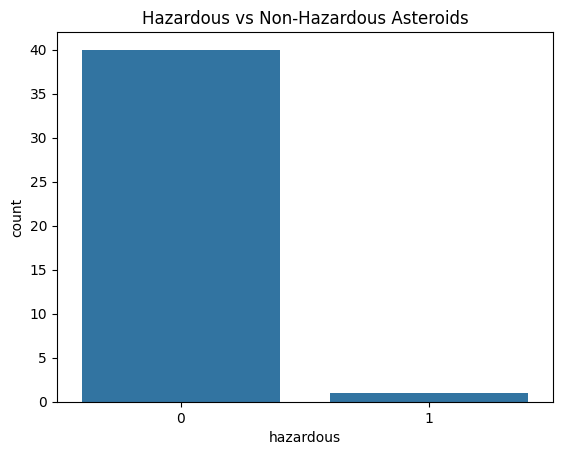

In [13]:
sns.countplot(x='hazardous', data=df)
plt.title("Hazardous vs Non-Hazardous Asteroids")
plt.show()


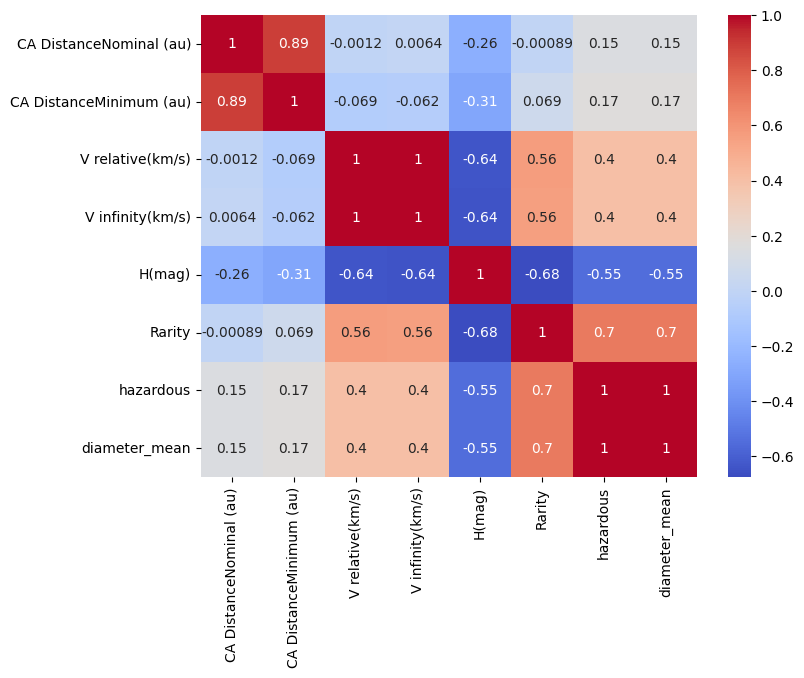

In [12]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()


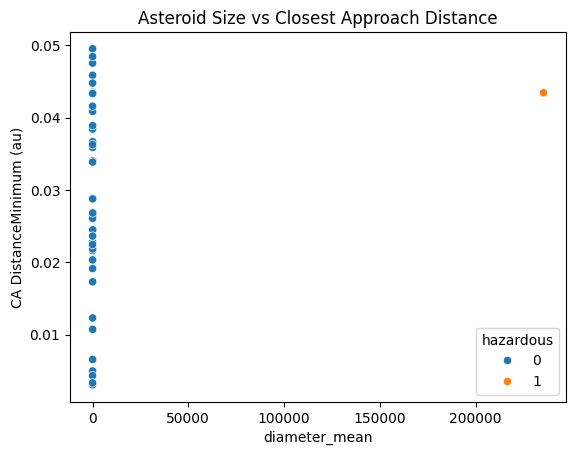

In [14]:
sns.scatterplot(
    x='diameter_mean',
    y='CA DistanceMinimum (au)',
    hue='hazardous',
    data=df
)
plt.title("Asteroid Size vs Closest Approach Distance")
plt.show()


In [15]:
df.to_csv("../data/processed/neo_clean.csv", index=False)


In [16]:
df.isnull().sum()


CA DistanceNominal (au)    0
CA DistanceMinimum (au)    0
V relative(km/s)           0
V infinity(km/s)           0
H(mag)                     0
Rarity                     0
hazardous                  0
diameter_mean              0
dtype: int64